# ref: https://puluwen.github.io/2019/01/GBDT-introduction/

## GBDT分类(也是使用回归树)

In [15]:
#导入模块
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import metrics

# Preprocessing

In [16]:
#获取数据
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

# Training Models(training dataset)

In [17]:
#切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#A创建分类器
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=2)

# 分类器的属性解释
# GradientBoostingClassifier(
# loss='deviance',        ##损失函数默认deviance deviance具有概率输出的分类的偏差
# n_estimators=100,       ##默认100 回归树个数 弱学习器个数
# learning_rate=0.1,      ##默认0.1学习速率/步长0.0-1.0的超参数 每个树学习前一个树的残差的步长
# max_depth=3,            ##默认值为3每个回归树的深度 控制树的大小 也可用叶节点的数量max leaf nodes控制
# subsample=1,            ##树生成时对样本采样 选择子样本<1.0导致方差的减少和偏差的增加
# min_samples_split=2,    ##生成子节点所需的最小样本数 如果是浮点数代表是百分比
# min_samples_leaf=1,     ##叶节点所需的最小样本数 如果是浮点数代表是百分比
# max_features=None,      ##在寻找最佳分割点要考虑的特征数量auto全选/sqrt开方/log2对数/None全选/int自定义几个/float百分比
# max_leaf_nodes=None,    ##叶节点的数量 None不限数量
# min_impurity_split=1e-7,##停止分裂叶子节点的阈值
# verbose=0,              ##打印输出 大于1打印每棵树的进度和性能
# warm_start=False,       ##True在前面基础上增量训练(重设参数减少训练次数) False默认擦除重新训练
# random_state=0          ##随机种子-方便重现
# )


#训练
model.fit(X_train,y_train)
y_hat = model.predict(X_train)
print(float(y_hat.shape[0]-sum((y_hat-y_train)*(y_hat-y_train)))/y_hat.shape[0])

0.9904761904761905


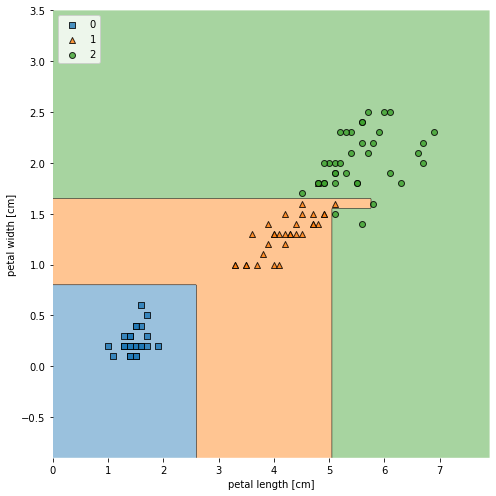

Accuracy: 0.9904761904761905


In [18]:
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(figsize=(7, 7))
# plot_decision_regions(X_train.iloc[:, -2:], y_train, clf=clf)
plot_decision_regions(X_train, y_train, clf=model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print("Accuracy:",metrics.accuracy_score(y_train, y_hat))

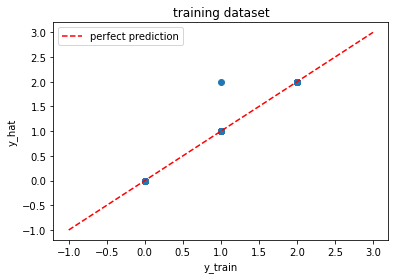

In [19]:
fig, ax=plt.subplots()
ax.scatter(y_train,y_hat)
ax.plot([-1,3], [-1,3], "r--", label="perfect prediction")
plt.legend()
ax.set(xlabel="y_train", ylabel="y_hat",title="training dataset")
plt.show()

# Using Models(testing dataset)

In [20]:
#预测
y_predict= model.predict(X_test)
print(float(y_predict.shape[0]-sum((y_predict-y_test)*(y_predict-y_test)))/y_predict.shape[0])

#5折cv验证
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print (scores)

0.9555555555555556
[0.96666667 0.96666667 0.9        0.93333333 1.        ]


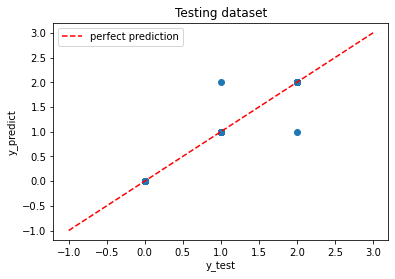

In [21]:
fig, ax=plt.subplots()
ax.scatter(y_test,y_predict)
ax.plot([-1,3], [-1,3], "r--", label="perfect prediction")
plt.legend()
ax.set(xlabel="y_test", ylabel="y_predict", title="Testing dataset")
plt.show()